In [1]:
import numpy as np
import mpmath as mp
import math
import matplotlib as mpl
import scipy.special as ss
from matplotlib import pyplot as plt
import time

In [ ]:
0.0000026*5.78838e-5

1.5049788000000001e-10

In [ ]:
9.20515692e-8*0.000002

1.8410313839999998e-13

In [2]:
#Parametros generales
h=4.135667696e-15
hb=h/(2*np.pi)
kb=8.617333262e-5
m=3.817545e-26
A=1e-15
V=1/(A**3)
N0=1e7
T0=5e-5

In [3]:
def f(x):
    F=-(((64*(kb**6)*(m**3)*(mp.pi**4)*(T0**6)*V)/(h**6))*mp.polylog(9/2,-mp.exp(x)))-N0
    return F
def df(x):
    d=-((64*(kb**6)*(m**3)*(mp.pi**4)*(T0**6)*V)/(h**6))*mp.polylog(7/2,-mp.exp(x))
    return d
def b(x):
    F=(((64*(kb**6)*(m**3)*(mp.pi**4)*(T0**6)*V)/(h**6))*mp.polylog(9/2,mp.exp(x)))-N0
    return F
def db(x):
    d=((64*(kb**6)*(m**3)*(mp.pi**4)*(T0**6)*V)/(h**6))*mp.polylog(7/2,mp.exp(x))
    return d

In [4]:
def nr_1var(f,df,x1,x2,dx,tol,MAX,n,t):
    while x1<x2:
        f_n=f(x1)
        f_np1=f(x1+dx)
        bracket=f_n*f_np1
        if bracket<0:
            x_n=x1
            step=1
            while True:
                x_nm1=x_n
                x_np1=x_n-(f(x_n)/df(x_n))
                x_n=x_np1
                step+=1
                if abs(x_n-x_nm1)<tol or step==MAX:
                    break
            return float(mp.nstr(x_n,50))
        x1=x1+dx

In [5]:
evap_cool_b={'N':[],'T':[],'E':[],'Mu':[],'Q':[],'Nf':[],'Tf':[]}
evap_cool_f={'N':[],'T':[],'E':[],'Mu':[],'Q':[],'Nf':[],'Tf':[]}
evap_cool_mb={'N':[],'T':[],'Q':[],'Nf':[],'Tf':[]}

In [6]:
#bosones
start1 = time.time()
print('Inicio')
n1=nr_1var(b,db,-3.8,-3.79,0.00001,0.0000001,10000,N0,T0)
mu0_b=n1*kb*T0
end1 = time.time() 
print(end1-start1)
print(n1)
print('Mu',mu0_b)
e0_b=(9/2)*N0*kb*T0*(mp.polylog(11/2,mp.exp(mu0_b/(kb*T0)))/mp.polylog(9/2,mp.exp(mu0_b/(kb*T0))))
print('E0',e0_b)

Inicio
4.120924472808838
-3.7931616753225432
Mu -1.6343469136450298e-08
E0 0.193793121378661


In [7]:
#fermiones
start2 = time.time()
print('Inicio')
n2=nr_1var(f,df,-3.8,-3.79,0.00001,0.0000001,10000,N0,T0)
mu0_f=n2*kb*T0
end2 = time.time() 
print(end2-start2)
print(n2)
print('Mu',mu0_f)
g112=-mp.polylog(11/2,-mp.exp(mu0_f/(kb*T0)))
g92=-mp.polylog(9/2,-mp.exp(mu0_f/(kb*T0)))
e0_f=(9/2)*N0*kb*T0*(g112/g92)
print('E0',e0_f)

Inicio
4.776159286499023
-3.791168780360594
Mu -1.633488241642866e-08
E0 0.193986323669108


In [ ]:
evap_cool_mb['N'].append(N0)
evap_cool_mb['T'].append(T0)

In [ ]:
evap_cool_b['N'].append(N0)
evap_cool_b['T'].append(T0)
evap_cool_b['Mu'].append(mu0_b)
evap_cool_b['E'].append(e0_b)

In [ ]:
evap_cool_f['N'].append(N0)
evap_cool_f['T'].append(T0)
evap_cool_f['Mu'].append(mu0_f)
evap_cool_f['E'].append(e0_f)

In [ ]:
Qc0=5e-4
dqc=1e-6
for i in range(1,1001):
    evap_cool_b['Q'].append(Qc0-i*dqc)
    evap_cool_f['Q'].append(Qc0-i*dqc)
    evap_cool_mb['Q'].append(Qc0-i*dqc)

In [ ]:
#Qc1=1e-4
#dqc1=1e-9
#for i in range(1,1001):
  #evap_cool_f['Q'].append(Qc1-i*dqc1)

In [ ]:
#evap_cool_b['Q'].clear()
#evap_cool_f['Q'].clear()
#evap_cool_mb['Q'].clear()

In [ ]:
#evap_cool_b['N'].clear()
#evap_cool_f['N'].clear()
#evap_cool_b['Nf'].clear()
#evap_cool_f['Nf'].clear()
#evap_cool_b['E'].clear()
#evap_cool_f['E'].clear()
#evap_cool_b['T'].clear()
#evap_cool_b['Tf'].clear()
#evap_cool_f['T'].clear()
#evap_cool_f['Tf'].clear()
#evap_cool_b['Mu'].clear()
#evap_cool_f['Mu'].clear()
#evap_cool_b['Q'].clear()
#evap_cool_f['Q'].clear()

## Método de Newton-Raphson de dos variables.



In [ ]:
def nr_2var_b(x1,y1,dx,dy,Ni,Ei):
  def f(Ti,mui):
      F=(((64*(kb**6)*(m**3)*(mp.pi**4)*(Ti**6)*V)/(h**6))*mp.polylog(9/2,mp.exp(mui/(kb*Ti))))-Ni
      return F      
  def g(Ti,mui):
      G=((9/2)*Ni*kb*Ti*(mp.polylog(11/2,mp.exp(mui/(kb*Ti)))/mp.polylog(9/2,mp.exp(mui/(kb*Ti)))))-Ei
      return G
  def f_y(Ti,mui):
      c1=(64*(kb**5)*(m**3)*(mp.pi**4)*(Ti**5)*V)/(h**6)
      f_y=c1*mp.polylog(7/2,mp.exp(mui/(kb*Ti)))
      return f_y
  def f_x(Ti,mui):
      c1=(64*(kb**5)*(m**3)*(mp.pi**4)*(Ti**4)*V)/(h**6)
      t1=mui*mp.polylog(7/2,mp.exp(mui/(kb*Ti)))
      t2=6*kb*Ti*mp.polylog(9/2,mp.exp(mui/(kb*Ti)))
      f_x=c1*(-t1+t2)
      return f_x
  def g_y(Ti,mui):
      t1=(9*Ni)/2
      num=9*Ni*mp.polylog(7/2,mp.exp(mui/(kb*Ti)))*mp.polylog(11/2,mp.exp(mui/(kb*Ti)))
      den=2*((mp.polylog(9/2,mp.exp(mui/(kb*Ti))))**2)
      g_y=t1-(num/den)
      return g_y
  def g_x(Ti,mui):
      t1=(9*mui*Ni)/(2*Ti)
      num1=9*mui*Ni*mp.polylog(7/2,mp.exp(mui/(kb*Ti)))*mp.polylog(11/2,mp.exp(mui/(kb*Ti)))
      den1=2*Ti*((mp.polylog(9/2,mp.exp(mui/(kb*Ti))))**2)
      num2=9*kb*Ni*mp.polylog(11/2,mp.exp(mui/(kb*Ti)))
      den2=2*mp.polylog(9/2,mp.exp(mui/(kb*Ti)))
      g_x=-t1+(num1/den1)+(num2/den2)
      return g_x
  x_n=x1+dx
  y_n=y1-dy
  x_np1= x_n + ((f_y(x_n,y_n)*g(x_n,y_n)-f(x_n,y_n)*g_y(x_n,y_n))/(f_x(x_n,y_n)*g_y(x_n,y_n)- f_y(x_n,y_n)*g_x(x_n,y_n)))
  y_np1= y_n + ((f(x_n,y_n)*g_x(x_n,y_n)-f_x(x_n,y_n)*g(x_n,y_n))/(f_x(x_n,y_n)*g_y(x_n,y_n)- f_y(x_n,y_n)*g_x(x_n,y_n)))
  #return [x_np1,y_np1]
  return [float(mp.nstr(mp.re(x_np1),50)),float(mp.nstr(mp.re(y_np1),50))]

In [ ]:
def nr_2var_f(x1,y1,dx,dy,Ni,Ei):
  def f(Ti,mui):
      F=-(((64*(kb**6)*(m**3)*(mp.pi**4)*(Ti**6)*V)/(h**6))*mp.polylog(9/2,-mp.exp(mui/(kb*Ti))))-Ni
      return F      
  def g(Ti,mui):
      G=((9/2)*Ni*kb*Ti*(mp.polylog(11/2,-mp.exp(mui/(kb*Ti)))/mp.polylog(9/2,-mp.exp(mui/(kb*Ti)))))-Ei
      return G
  def f_y(Ti,mui):
      c1=-(64*(kb**5)*(m**3)*(mp.pi**4)*(Ti**5)*V)/(h**6)
      f_y=c1*mp.polylog(7/2,-mp.exp(mui/(kb*Ti)))
      return f_y
  def f_x(Ti,mui):
      c1=(64*(kb**5)*(m**3)*(mp.pi**4)*(Ti**4)*V)/(h**6)
      t1=mui*mp.polylog(7/2,-mp.exp(mui/(kb*Ti)))
      t2=6*kb*Ti*mp.polylog(9/2,-mp.exp(mui/(kb*Ti)))
      f_x=c1*(t1-t2)
      return f_x
  def g_y(Ti,mui):
      t1=(9*Ni)/2
      num=9*Ni*mp.polylog(7/2,-mp.exp(mui/(kb*Ti)))*mp.polylog(11/2,-mp.exp(mui/(kb*Ti)))
      den=2*((mp.polylog(9/2,-mp.exp(mui/(kb*Ti))))**2)
      g_y=t1-(num/den)
      return g_y
  def g_x(Ti,mui):
      t1=(9*mui*Ni)/(2*Ti)
      num1=9*mui*Ni*mp.polylog(7/2,-mp.exp(mui/(kb*Ti)))*mp.polylog(11/2,-mp.exp(mui/(kb*Ti)))
      den1=2*Ti*((mp.polylog(9/2,-mp.exp(mui/(kb*Ti))))**2)
      num2=9*kb*Ni*mp.polylog(11/2,-mp.exp(mui/(kb*Ti)))
      den2=2*mp.polylog(9/2,-mp.exp(mui/(kb*Ti)))
      g_x=-t1+(num1/den1)+(num2/den2)
      return g_x
  x_n=x1+dx
  y_n=y1-dy
  x_np1= x_n + ((f_y(x_n,y_n)*g(x_n,y_n)-f(x_n,y_n)*g_y(x_n,y_n))/(f_x(x_n,y_n)*g_y(x_n,y_n)- f_y(x_n,y_n)*g_x(x_n,y_n)))
  y_np1= y_n + ((f(x_n,y_n)*g_x(x_n,y_n)-f_x(x_n,y_n)*g(x_n,y_n))/(f_x(x_n,y_n)*g_y(x_n,y_n)- f_y(x_n,y_n)*g_x(x_n,y_n)))
  #return [x_np1,y_np1]
  return [float(mp.nstr(mp.re(x_np1),50)),float(mp.nstr(mp.re(y_np1),50))]

# Proceso recursivo.

Funciones recursivas para fermiones.

In [ ]:
def nf(Ni,Ti,Mui,qc):
  etac=qc/Ti
  g92t = -mp.polylog(9/2,-mp.exp(Mui/(kb*Ti))*mp.erf(mp.sqrt(etac)))
  g4b = -mp.polylog(4,-mp.exp((Mui/(kb*Ti))-etac))
  g92 = -mp.polylog(9/2,-mp.exp(Mui/(kb*Ti)))
  N1=((g92t/g92)-((2*mp.sqrt(etac/mp.pi))*(g4b/g92)))*Ni
  #return N1
  return float(mp.nstr(mp.re(N1),35))

def ef(Ni,Ti,Mui,Ei,qc):
  etac=qc/Ti
  g112t=-mp.polylog(11/2,-mp.exp(Mui/(kb*Ti))*mp.erf(mp.sqrt(etac)))
  g4b=-mp.polylog(4,-mp.exp((Mui/(kb*Ti))-etac))
  g5b=-mp.polylog(5,-mp.exp((Mui/(kb*Ti))-etac))
  g112=-mp.polylog(11/2,-mp.exp(Mui/(kb*Ti)))
  E1=((g112t/g112)-((2*mp.sqrt(etac/mp.pi))*(g5b/g112))-(((4*(etac**(3/2)))/(9*mp.sqrt(mp.pi)))*(g4b/g112)))*Ei
  #return E1
  return float(mp.nstr(mp.re(E1),35))

Funciones recursivas para bosones.

In [ ]:
def nb(Ni,Ti,Mui,qc):
  etac=qc/Ti
  g92t=mp.polylog(9/2,mp.exp(Mui/(kb*Ti))*mp.erf(mp.sqrt(etac)))
  g4b=mp.polylog(4,mp.exp((Mui/(kb*Ti))-etac))
  g92=mp.polylog(9/2,mp.exp(Mui/(kb*Ti)))
  N1=((g92t/g92)-((2*mp.sqrt(etac/mp.pi))*(g4b/g92)))*Ni
  #return N1
  return float(mp.nstr(mp.re(N1),35))

def eb(Ni,Ti,Mui,Ei,qc):
  etac=qc/Ti
  g112t=mp.polylog(11/2,mp.exp(Mui/(kb*Ti))*mp.erf(mp.sqrt(etac)))
  g4b=mp.polylog(4,mp.exp((Mui/(kb*Ti))-etac))
  g5b=mp.polylog(5,mp.exp((Mui/(kb*Ti))-etac))
  g112=mp.polylog(11/2,mp.exp(Mui/(kb*Ti)))
  E1=((g112t/g112)-((2*mp.sqrt(etac/mp.pi))*(g5b/g112))-(((4*(etac**(3/2)))/(9*mp.sqrt(mp.pi)))*(g4b/g112)))*Ei
  #return E1
  return float(mp.nstr(mp.re(E1),35))

Funciones de Maxwell-Boltzmann

In [ ]:
def n_mb(n0,TC,t0):
    eta=np.sqrt(TC/t0)
    a1=2/np.sqrt(np.pi)
    f1= ss.erf(eta)-a1*eta*np.exp(-(TC/t0))
    return n0*f1
def t_mb(TC,t0):
    eta=np.sqrt(TC/t0)
    f1=2/np.sqrt(np.pi)
    f2=4/(9*(np.sqrt(np.pi)))
    num=(ss.erf(eta))-(f1*eta*np.exp(-TC/t0))-(f2*((TC/t0)**1.5)*np.exp(-TC/t0))
    den=ss.erf(eta)-(f1*eta*np.exp(-TC/t0))
    return t0*(num/den)

## Valores Preeliminares

In [ ]:
def f(Ti,mui,Ni):
  lam=mp.sqrt(h**2/(2*mp.pi*m*kb*Ti))
  F=(8*mp.pi*(((kb*Ti)/lam)**3)*V*mp.polylog(9/2,mp.exp(mui/(kb*Ti))))-Ni
  return F
def g(Ti,mui,Ni,Ei):
  G=(9/2)*Ni*kb*Ti*(mp.polylog(11/2,mp.exp(mui/(kb*Ti)))/mp.polylog(9/2,mp.exp(mui/(kb*Ti))))-Ei
  return G
def f_y(Ti,mui):
  c1=h**2/(kb*m*Ti)
  F_mui=((16*mp.sqrt(2)*(kb**2)*(mp.pi**(5/2))*(Ti**2)*V)/(c1**(3/2)))*mp.polylog(7/2,mp.exp(mui/(kb*Ti)))
  return F_mui
def f_x(Ti,mui):
  c1=h**2/(kb*m*Ti)
  t1=((16*mp.sqrt(2)*(kb**2)*mui*(mp.pi**(5/2))*Ti*V)/(c1**(3/2)))*mp.polylog(7/2,mp.exp(mui/(kb*Ti)))
  t2=((24*mp.sqrt(2)*(h**2)*(kb**2)*(mp.pi**(5/2))*Ti*V)/(m*c1**(5/2)))*mp.polylog(9/2,mp.exp(mui/(kb*Ti)))
  t3=((48*mp.sqrt(2)*(kb**3)*(mp.pi**(5/2))*(Ti**2)*V)/(c1**(3/2)))*mp.polylog(9/2,mp.exp(mui/(kb*Ti)))
  F_Ti= -t1+t2+t3
  return F_Ti
def g_y(Ti,mui,Ni):
  t1=(9/2)*Ni
  t2=(9*Ni*mp.polylog(7/2,mp.exp(mui/(kb*Ti)))*mp.polylog(11/2,mp.exp(mui/(kb*Ti))))/(2*(mp.polylog(9/2,mp.exp(mui/(kb*Ti))))**2)
  G_mui=t1-t2
  return G_mui
def g_x(Ti,mui,Ni):
  t1=(9*mui*Ni)/(2*Ti)
  t2=((9*mui*Ni)/(2*Ti))*((mp.polylog(7/2,mp.exp(mui/(kb*Ti)))*mp.polylog(11/2,mp.exp(mui/(kb*Ti))))/(mp.polylog(9/2,mp.exp(mui/(kb*Ti)))**2))
  t3=((9*kb*Ni)/(2))*(mp.polylog(11/2,mp.exp(mui/(kb*Ti)))/(mp.polylog(9/2,mp.exp(mui/(kb*Ti)))))
  G_Ti=-t1+t2+t3
  return G_Ti

In [ ]:
n1=nf(evap_cool_b['N'][0],evap_cool_b['T'][0],evap_cool_b['Mu'][0],evap_cool_b['Q'][0])
e1=ef(evap_cool_b['N'][0],evap_cool_b['T'][0],evap_cool_b['Mu'][0],evap_cool_b['E'][0],evap_cool_b['Q'][0])
dx=1e-16
dy=1e-18
x_n=T0-dx
y_n=mu0_b+dy
t1=x_n + ((f_y(x_n,y_n)*g(x_n,y_n,n1,e1)-f(x_n,y_n,n1)*g_y(x_n,y_n,n1))/(f_x(x_n,y_n)*g_y(x_n,y_n,n1)- f_y(x_n,y_n)*g_x(x_n,y_n,n1)))
mu1=y_n + ((f(x_n,y_n,n1)*g_x(x_n,y_n,n1)-f_x(x_n,y_n)*g(x_n,y_n,n1,e1))/(f_x(x_n,y_n)*g_y(x_n,y_n,n1)- f_y(x_n,y_n)*g_x(x_n,y_n,n1)))
print(n1,t1,e1,mu1)

9998268.305372871 4.99567139560601e-5 0.19368858151340324 -2.0616904349609e-8


In [ ]:
n2=nf(n1,t1,mu1,evap_cool_b['Q'][1])
e2=ef(n1,t1,mu1,e1,evap_cool_b['Q'][1])
dx=1e-16
dy=1e-18
x_n=t1-dx
y_n=mu1+dy
t2=x_n + ((f_y(x_n,y_n)*g(x_n,y_n,n1,e1)-f(x_n,y_n,n1)*g_y(x_n,y_n,n1))/(f_x(x_n,y_n)*g_y(x_n,y_n,n1)- f_y(x_n,y_n)*g_x(x_n,y_n,n1)))
mu2=y_n + ((f(x_n,y_n,n1)*g_x(x_n,y_n,n1)-f_x(x_n,y_n)*g(x_n,y_n,n1,e1))/(f_x(x_n,y_n)*g_y(x_n,y_n,n1)- f_y(x_n,y_n)*g_x(x_n,y_n,n1)))
print(n2,t2,e2,mu2)

9996519.01680106 4.99567002509693e-5 0.19358307558148558 -2.49202384723323e-8


In [ ]:
n3=nf(n2,t2,mu2,evap_cool_b['Q'][2])
e3=ef(n2,t2,mu2,e2,evap_cool_b['Q'][2])
dx=1e-16
dy=1e-18
x_n=t1-dx
y_n=mu1+dy
t3=x_n + ((f_y(x_n,y_n)*g(x_n,y_n,n1,e1)-f(x_n,y_n,n1)*g_y(x_n,y_n,n1))/(f_x(x_n,y_n)*g_y(x_n,y_n,n1)- f_y(x_n,y_n)*g_x(x_n,y_n,n1)))
mu3=y_n + ((f(x_n,y_n,n1)*g_x(x_n,y_n,n1)-f_x(x_n,y_n)*g(x_n,y_n,n1,e1))/(f_x(x_n,y_n)*g_y(x_n,y_n,n1)- f_y(x_n,y_n)*g_x(x_n,y_n,n1)))
print(n3,t3,e3,mu3)

9994736.686990049 4.99567002509693e-5 0.1934757589265163 -2.49202384723323e-8


In [ ]:
n4=nf(n3,t3,mu3,evap_cool_b['Q'][3])
e4=ef(n3,t3,mu3,e3,evap_cool_b['Q'][3])
dx=1e-16
dy=1e-18
x_n=t1-dx
y_n=mu1+dy
t4=x_n + ((f_y(x_n,y_n)*g(x_n,y_n,n1,e1)-f(x_n,y_n,n1)*g_y(x_n,y_n,n1))/(f_x(x_n,y_n)*g_y(x_n,y_n,n1)- f_y(x_n,y_n)*g_x(x_n,y_n,n1)))
mu4=y_n + ((f(x_n,y_n,n1)*g_x(x_n,y_n,n1)-f_x(x_n,y_n)*g(x_n,y_n,n1,e1))/(f_x(x_n,y_n)*g_y(x_n,y_n,n1)- f_y(x_n,y_n)*g_x(x_n,y_n,n1)))
print(n4,t4,e4,mu4)

9992920.313415697 4.99567002509693e-5 0.19336658937090478 -2.49202384723323e-8


In [ ]:
n5=nf(n4,t4,mu4,evap_cool_b['Q'][4])
e5=ef(n4,t4,mu4,e4,evap_cool_b['Q'][4])
dx=1e-7
dy=1e-10
x_n=t1-dx
y_n=mu1-dy
t5=x_n + ((f_y(x_n,y_n)*g(x_n,y_n,n1,e1)-f(x_n,y_n,n1)*g_y(x_n,y_n,n1))/(f_x(x_n,y_n)*g_y(x_n,y_n,n1)- f_y(x_n,y_n)*g_x(x_n,y_n,n1)))
mu5=y_n + ((f(x_n,y_n,n1)*g_x(x_n,y_n,n1)-f_x(x_n,y_n)*g(x_n,y_n,n1,e1))/(f_x(x_n,y_n)*g_y(x_n,y_n,n1)- f_y(x_n,y_n)*g_x(x_n,y_n,n1)))
print(n5,t5,e5,mu5)

9991069.255322326 4.99566384973464e-5 0.19325553643354831 -2.50919428120449e-8


In [ ]:
n6=nf(n5,t5,mu5,evap_cool_b['Q'][5])
e6=ef(n5,t5,mu5,e5,evap_cool_b['Q'][5])
dx=1e-7
dy=1e-10
x_n=t1-dx
y_n=mu1-dy
t6=x_n + ((f_y(x_n,y_n)*g(x_n,y_n,n1,e1)-f(x_n,y_n,n1)*g_y(x_n,y_n,n1))/(f_x(x_n,y_n)*g_y(x_n,y_n,n1)- f_y(x_n,y_n)*g_x(x_n,y_n,n1)))
mu6=y_n + ((f(x_n,y_n,n1)*g_x(x_n,y_n,n1)-f_x(x_n,y_n)*g(x_n,y_n,n1,e1))/(f_x(x_n,y_n)*g_y(x_n,y_n,n1)- f_y(x_n,y_n)*g_x(x_n,y_n,n1)))
print(n6,t6,e6,mu6)

9989182.89126462 4.99566384973464e-5 0.19314257068849652 -2.50919428120449e-8


In [ ]:
n7=nf(n6,t6,mu6,evap_cool_b['Q'][6])
e7=ef(n6,t6,mu6,e6,evap_cool_b['Q'][6])
dx=1e-7
dy=1e-10
x_n=t1-dx
y_n=mu1-dy
t7=x_n + ((f_y(x_n,y_n)*g(x_n,y_n,n1,e1)-f(x_n,y_n,n1)*g_y(x_n,y_n,n1))/(f_x(x_n,y_n)*g_y(x_n,y_n,n1)- f_y(x_n,y_n)*g_x(x_n,y_n,n1)))
mu7=y_n + ((f(x_n,y_n,n1)*g_x(x_n,y_n,n1)-f_x(x_n,y_n)*g(x_n,y_n,n1,e1))/(f_x(x_n,y_n)*g_y(x_n,y_n,n1)- f_y(x_n,y_n)*g_x(x_n,y_n,n1)))
print(n7,t7,e7,mu7)

9987260.526291583 4.99566384973464e-5 0.19302765925725243 -2.50919428120449e-8


# Simulación de recursividad

In [ ]:
for i in range(0,1000):
  evap_cool_b['N'].append(nb(evap_cool_b['N'][i],evap_cool_b['T'][i],evap_cool_b['Mu'][i],evap_cool_b['Q'][i]))
  #evap_cool_b['Nf'].append(evap_cool_b['N'][i]/N0)
  evap_cool_b['E'].append(eb(evap_cool_b['N'][i],evap_cool_b['T'][i],evap_cool_b['Mu'][i],evap_cool_b['E'][i],evap_cool_b['Q'][i]))
  t_mub=nr_2var_b(evap_cool_b['T'][i],evap_cool_b['Mu'][i],1e-50,1e-50,evap_cool_b['N'][i+1],evap_cool_b['E'][i+1])##e-16 y e-18
  evap_cool_b['T'].append(t_mub[0])
  #evap_cool_b['Tf'].append(evap_cool_b['T'][i]/T0)
  evap_cool_b['Mu'].append(t_mub[1])
  #evap_cool_mb['N'].append(n_mb(evap_cool_mb['N'][i],evap_cool_mb['Q'][i],evap_cool_mb['T'][i]))
  #evap_cool_mb['T'].append(t_mb(evap_cool_mb['Q'][i],evap_cool_mb['T'][i]))
  #evap_cool_mb['Nf'].append(evap_cool_mb['N'][i]/N0)
  #evap_cool_mb['Tf'].append(evap_cool_mb['T'][i]/T0)

ZeroDivisionError: ignored

In [ ]:
for i in range(0,1000):
  evap_cool_f['N'].append(nf(evap_cool_f['N'][i],evap_cool_f['T'][i],evap_cool_f['Mu'][i],evap_cool_f['Q'][i]))
  #evap_cool_f['Nf'].append(evap_cool_f['N'][i]/N0)
  evap_cool_f['E'].append(ef(evap_cool_f['N'][i],evap_cool_f['T'][i],evap_cool_f['Mu'][i],evap_cool_f['E'][i],evap_cool_f['Q'][i]))
  t_muf=nr_2var_f(evap_cool_f['T'][i],evap_cool_f['Mu'][i],1e-50,1e-50,evap_cool_f['N'][i+1],evap_cool_f['E'][i+1])##e-16 y e-18
  evap_cool_f['T'].append(t_muf[0])
  #evap_cool_f['Tf'].append(evap_cool_f['T'][i]/T0)
  evap_cool_f['Mu'].append(t_muf[1])

ZeroDivisionError: ignored

In [ ]:
for i in range(0,1000):
  evap_cool_mb['N'].append(n_mb(evap_cool_mb['N'][i],evap_cool_mb['Q'][i],evap_cool_mb['T'][i]))
  evap_cool_mb['T'].append(t_mb(evap_cool_mb['Q'][i],evap_cool_mb['T'][i]))
  #evap_cool_mb['Nf'].append(evap_cool_mb['N'][i]/N0)
  #evap_cool_mb['Tf'].append(evap_cool_mb['T'][i]/T0)

<ipython-input-21-e95caf67b397>:12: RuntimeWarning: invalid value encountered in double_scalars
  return t0*(num/den)


In [ ]:
#evap_cool_b['N'].clear()
#evap_cool_b['Nf'].clear()
#evap_cool_b['E'].clear()
#evap_cool_b['T'].clear()
#evap_cool_b['Tf'].clear()
#evap_cool_b['Mu'].clear()


In [ ]:
#evap_cool_f['N'].clear()
#evap_cool_f['Nf'].clear()
#evap_cool_f['E'].clear()
#evap_cool_f['T'].clear()
#evap_cool_f['Tf'].clear()
#evap_cool_f['Mu'].clear()

In [ ]:
#evap_cool_mb['N'].clear()
#evap_cool_mb['T'].clear()

In [ ]:
print(evap_cool_b['N'][450:485])
print(len(evap_cool_b['N']))
print(evap_cool_b['T'][450:485])
print(len(evap_cool_b['T']))

[2035658.500340715, 1975008.2878566696, 1913859.3837037557, 1852242.0059937295, 1790191.2217493597, 1727747.3181107666, 1664956.1752302502, 1601869.6357163764, 1538545.8644559127, 1475049.6915180085, 1411452.9296258667, 1347834.656390857, 1284281.4501687493, 1220887.5670006177, 1157755.0448321477, 1094993.7197497655, 1032721.1381606538, 971062.3473621301, 910149.5469537318, 850121.5832642099, 791123.2663275244, 733304.5022682875, 676819.1986002331, 621823.9941685012, 568476.6785535036, 516934.4775246327, 467352.16227186524, 419879.0392129411, 374659.55824028584, 331821.6945471431, 291496.1012645179, 253771.7655428691, 218733.9012605291, 186570.70946389582, 156698.26912980084]
501
[1.161211451397917e-05, 1.1491174350778581e-05, 1.1369678921071845e-05, 1.1247562898550841e-05, 1.1124756144781484e-05, 1.1001183487791342e-05, 1.087676448869043e-05, 1.0751413195404101e-05, 1.062503788222583e-05, 1.0497540774002316e-05, 1.0368817753433722e-05, 1.023875804922538e-05, 1.0107243904425882e-05, 9.

In [ ]:
print(evap_cool_f['N'][400:421])
print(len(evap_cool_f['N']))
print(evap_cool_f['T'][400:421])
print(len(evap_cool_f['T']))

[4818598.158504362, 4793607.896894607, 4768606.924363062, 4743600.47285965, 4718594.49221517, 4693595.79776581, 4668612.258847117, 4643653.042636162, 4618728.93430579, 4593852.7645825045, 4569039.992116077, 4544309.515323771, 4519684.835871617, 4495195.783028549, 4470881.177821193, 4446793.1726192525, 4423004.827245258, 4399624.650676745, 4376828.622834979, 4354947.850603867, 4334828.544525755]
458
[1.4548909135108906e-05, 1.4369926983249161e-05, 1.418816348508429e-05, 1.4003374695587413e-05, 1.3815278071219509e-05, 1.3623543237021068e-05, 1.3427779703932704e-05, 1.3227520210565113e-05, 1.3022197626425727e-05, 1.2811112101122496e-05, 1.2593382928133922e-05, 1.2367875481211151e-05, 1.2133085516885132e-05, 1.1886946209262668e-05, 1.1626484677396818e-05, 1.1347156976487415e-05, 1.1041406303699444e-05, 1.0694990218280481e-05, 1.027495039405986e-05, 9.666801559498094e-06, 7.064989693194807e-06]
458


In [ ]:
print(evap_cool_mb['N'][400:500])
print(len(evap_cool_mb['N']))
print(evap_cool_mb['T'][400:500])
print(len(evap_cool_mb['T']))

[4665139.596525868, 4635781.9567725565, 4606265.204733535, 4576587.129007637, 4546745.464636425, 4516737.891355755, 4486562.031771382, 4456215.449454574, 4425695.646953425, 4395000.063715325, 4364126.073915688, 4333070.984187797, 4301832.031248204, 4270406.379411825, 4238791.1179904165, 4206983.258567744, 4174979.7321442417, 4142777.386143501, 4110372.9812723724, 4077763.188225886, 4044944.5842275545, 4011913.6493949606, 3978666.7629197715, 3945200.1990505247, 3911510.122865666, 3877592.585823351, 3843443.521073511, 3809058.738516546, 3774433.919591784, 3739564.611777517, 3704446.2227829453, 3669074.014410787, 3633443.096067545, 3597548.4178965213, 3561384.7635065587, 3524946.7422671984, 3488228.7811384, 3451225.116000192, 3413929.782444547, 3376336.6059884047, 3338439.19166302, 3300230.9129306963, 3261704.899875401, 3222854.026608697, 3183670.897826824, 3144147.834448534, 3104276.858256364, 3064049.67545632, 3023457.6590623697, 2982491.8300025444, 2941142.836832753, 2899400.9339324385

In [ ]:
#import pandas
#cuad_t_vs_q_mb = pandas.DataFrame(data={"Q[K]":evap_cool_mb['Q'],"T_MB[K]":evap_cool_mb['T'][0:5001]})
#cuad_t_vs_q_be = pandas.DataFrame(data={"Q[K]":evap_cool_b['Q'][0:4977],"T_BE[K]":evap_cool_b['T']})
#cuad_t_vs_q_fd = pandas.DataFrame(data={"Q[K]":evap_cool_f['Q'][0:4997],"T_FD[K]":evap_cool_f['T']})
#cuad_n_vs_q_mb = pandas.DataFrame(data={"Q[K]":evap_cool_mb['Q'],"N_MB":evap_cool_mb['N'][0:5001]})
#cuad_n_vs_q_be = pandas.DataFrame(data={"Q[K]":evap_cool_b['Q'][0:4977],"N_BE":evap_cool_b['N']})
#cuad_n_vs_q_fd = pandas.DataFrame(data={"Q[K]":evap_cool_f['Q'][0:4997],"N_FD":evap_cool_f['N']})
#cuad_t_vs_n_mb = pandas.DataFrame(data={"T_MB[K]": evap_cool_mb['T'],"N_MB": evap_cool_mb['N']})
#cuad_t_vs_n_be = pandas.DataFrame(data={"T_BE[K]":evap_cool_b['T'],"N_BE":evap_cool_b['N']})
#cuad_t_vs_n_fd = pandas.DataFrame(data={"T_FD[K]":evap_cool_f['T'],"N_FD":evap_cool_f['N']})
#cuad_t_vs_q_mb.to_csv("./cuad_t_vs_q_mb.csv", sep=',',index=False)
#cuad_t_vs_q_be.to_csv("./cuad_t_vs_q_be.csv", sep=',',index=False)
#cuad_t_vs_q_fd.to_csv("./cuad_t_vs_q_fd.csv", sep=',',index=False)
#cuad_n_vs_q_mb.to_csv("./cuad_n_vs_q_mb.csv", sep=',',index=False)
#cuad_n_vs_q_be.to_csv("./cuad_n_vs_q_be.csv", sep=',',index=False)
#cuad_n_vs_q_fd.to_csv("./cuad_n_vs_q_fd.csv", sep=',',index=False)
#cuad_t_vs_n_mb.to_csv("./cuad_t_vs_n_mb.csv", sep=',',index=False)
#cuad_t_vs_n_be.to_csv("./cuad_t_vs_n_be.csv", sep=',',index=False)
#cuad_t_vs_n_fd.to_csv("./cuad_t_vs_n_fd.csv", sep=',',index=False)

# Gráficas.

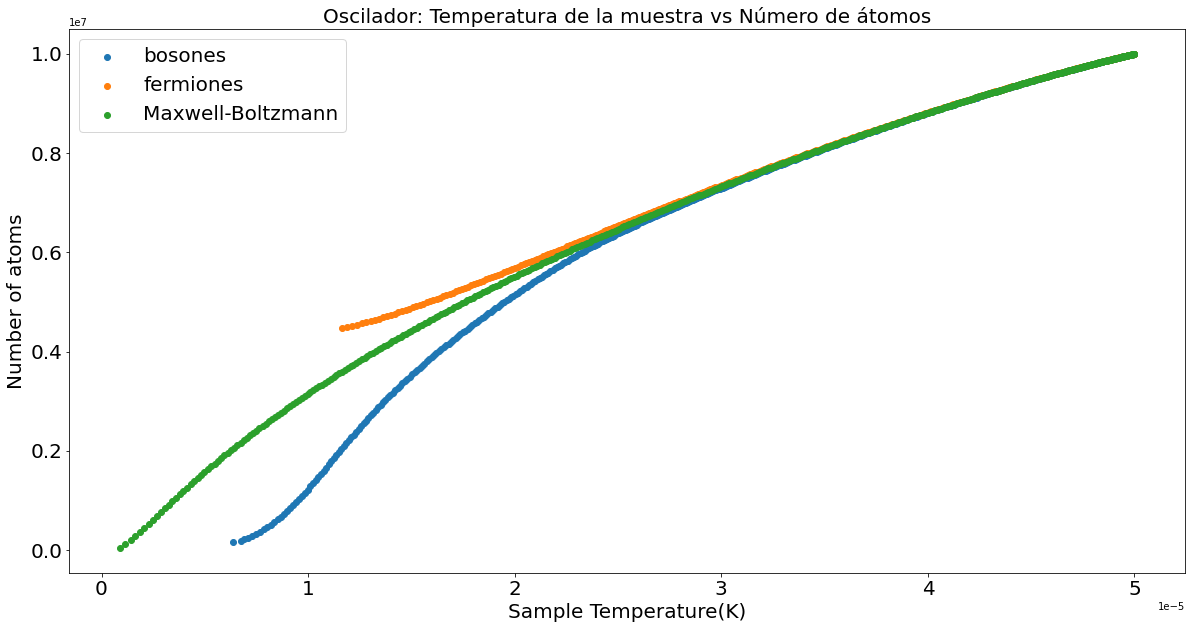

In [ ]:
plt.figure(figsize=(20,10))

plt.scatter(evap_cool_b['T'][0:485],evap_cool_b['N'][0:485],label='bosones')
plt.scatter(evap_cool_f['T'][0:415],evap_cool_f['N'][0:415], label='fermiones')
plt.scatter(evap_cool_mb['T'][0:500],evap_cool_mb['N'][0:500], label='Maxwell-Boltzmann')
#plt.xlim(0,1e-5)
#plt.ylim(0,0.1e7)
#plt.xscale('log')
#plt.yscale('log')

plt.xlabel('Sample Temperature(K)',fontsize=20)
plt.ylabel('Number of atoms',fontsize=20)

plt.title("Oscilador: Temperatura de la muestra vs Número de átomos", fontsize=20)

plt.legend(fontsize=20)
plt.tick_params(axis='both', labelsize=20)

#plt.savefig('figurita_nueva.jpg')

plt.show()

In [ ]:
plt.figure(figsize=(20,10))

plt.scatter(evap_cool_b['Tf'][0:2000],evap_cool_b['Nf'][0:2000],label='bosones')
plt.scatter(evap_cool_f['Tf'][0:2000],evap_cool_f['Nf'][0:2000],label='fermiones')
plt.scatter(evap_cool_mb['Tf'],evap_cool_mb['Nf'], label='Maxwell-Boltzmann')
#plt.xlim(3.5e-7,10e-7)
#plt.ylim(0,10000)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('$T_i/T_0$',fontsize=20)
plt.ylabel('$N_i/N_0$',fontsize=20)

plt.title("Oscilador: Number of atoms vs. Sample Temperature(K)", fontsize=20)

plt.legend(fontsize=20)
plt.tick_params(axis='both', labelsize=20)

#plt.savefig('figurita_nueva.jpg')

plt.show()

In [ ]:
plt.figure(figsize=(20,10))

plt.scatter(evap_cool_b['Q'][0:2000],evap_cool_b['Tf'][0:2000],label='bosones')
plt.scatter(evap_cool_f['Q'][0:2000],evap_cool_f['Tf'][0:2000],label='fermiones')
plt.scatter(evap_cool_mb['Q'][0:5001],evap_cool_mb['Tf'][0:5001], label='Maxwell-Boltzmann')
#plt.xlim(3.5e-7,10e-7)
#plt.ylim(0,10000)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Q [K]',fontsize=20)
plt.ylabel('T [K]',fontsize=20)

plt.title("Oscilador: Sample temperature (T) vs. Cut-off temperature (Q)", fontsize=20)

plt.legend(fontsize=20)
plt.tick_params(axis='both', labelsize=20)

#plt.savefig('figurita_nueva.jpg')

plt.show()

In [ ]:
plt.figure(figsize=(20,10))

plt.scatter(evap_cool_b['Q'][0:4976],evap_cool_b['Nf'][0:4976],label='bosones')
plt.scatter(evap_cool_f['Q'][0:4979],evap_cool_f['Nf'][0:4979],label='fermiones')
plt.scatter(evap_cool_mb['Q'][0:5001],evap_cool_mb['Nf'][0:5001], label='Maxwell-Boltzmann')
#plt.xlim(3.5e-7,10e-7)
#plt.ylim(0,10000)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Q [K]',fontsize=20)
plt.ylabel('N ',fontsize=20)

plt.title("Oscilador: Number of atoms (N) vs. Cut-off temperature (Q)", fontsize=20)

plt.legend(fontsize=20)
plt.tick_params(axis='both', labelsize=20)

#plt.savefig('figurita_nueva.jpg')

plt.show()

In [ ]:
fig,axs=plt.subplots(3,3,figsize=(20,20))
axs[0,0].scatter(evap_cool_mb['Q'][0:5001],evap_cool_mb['T'][0:5001],c='r')
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,0].set_title("MB Oscilador: T vs. Q")
axs[0,0].set_xlabel('Cut-off temperature [K]')
axs[0,0].set_ylabel('Sample temperature [K]')

axs[0,1].scatter(evap_cool_b['Q'][0:4976],evap_cool_b['T'][0:4976],c='r')
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[0,1].set_title("Bosones Oscilador: T vs. Q")
axs[0,1].set_xlabel('Cut-off temperature [K]')
axs[0,1].set_ylabel('Sample temperature [K]')

axs[0,2].scatter(evap_cool_f['Q'][0:4979],evap_cool_f['T'][0:4979],c='r')
axs[0,2].set_xscale('log')
axs[0,2].set_yscale('log')
axs[0,2].set_title("Fermiones Oscilador: T vs. Q")
axs[0,2].set_xlabel('Cut-off temperature [K]')
axs[0,2].set_ylabel('Sample temperature [K]')

axs[1,0].scatter(evap_cool_mb['Q'][0:5001],evap_cool_mb['N'][0:5001],c='r')
axs[1,0].set_title("MB Oscilador: N vs. Q")
axs[1,0].set_xlabel('Cut-off temperature [K]')
axs[1,0].set_ylabel('Fraction of atoms')

axs[1,1].scatter(evap_cool_b['Q'][0:4976],evap_cool_b['N'][0:4976],c='r')
axs[1,1].set_title("Bosones Oscilador: N vs. Q")
axs[1,1].set_xlabel('Cut-off temperature [K]')
axs[1,1].set_ylabel('Fraction of atoms')

axs[1,2].scatter(evap_cool_f['Q'][0:4979],evap_cool_f['N'][0:4979],c='r')
axs[1,2].set_title("Fermiones Oscilador: N vs. Q")
axs[1,2].set_xlabel('Cut-off temperature [K]')
axs[1,2].set_ylabel('Fraction of atoms')

axs[2,0].scatter(evap_cool_mb['T'],evap_cool_mb['N'],c='r')
#axs[2,0].set_xscale('log')
#axs[2,0].set_yscale('log')
axs[2,0].set_title("MB Oscilador: N vs. T")
axs[2,0].set_xlabel('Sample temperature [K]')
axs[2,0].set_ylabel('Fraction of atoms')

axs[2,1].scatter(evap_cool_b['T'][0:4976],evap_cool_b['N'][0:4976],c='r')
axs[2,1].set_title("Bosones Oscilador: N vs. T")
axs[2,1].set_xlabel('Sample temperature [K]')
axs[2,1].set_ylabel('Fraction of atoms')

axs[2,2].scatter(evap_cool_f['T'][0:4979],evap_cool_f['N'][0:4979],c='r')
axs[2,2].set_title("Fermiones Oscilador: N vs. T")
axs[2,2].set_xlabel('Sample temperature [K]')
axs[2,2].set_ylabel('Fraction of atoms')

#fig.savefig('evap_cool_oscilador.png')

In [ ]:
fig,axs=plt.subplots(1,3,figsize=(40,10))
axs[0].scatter(evap_cool_mb['Q'][0:5001],evap_cool_mb['Tf'][0:5001],c='b')
axs[0].scatter(evap_cool_b['Q'][0:4976],evap_cool_b['Tf'][0:4976],c='g')
axs[0].scatter(evap_cool_f['Q'][0:4979],evap_cool_f['Tf'][0:4979],c='r')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_title("T vs. Q")
axs[0].set_xlabel('Cut-off temperature [K]')
axs[0].set_ylabel('Sample temperature [K]')
#axs[0].legend(fontsize=20)
#axs[0].tick_params(axis='both', labelsize=20)

axs[1].scatter(evap_cool_mb['Q'][0:5001],evap_cool_mb['Nf'][0:5001],c='b')
axs[1].scatter(evap_cool_b['Q'][0:4976],evap_cool_b['Nf'][0:4976],c='g')
axs[1].scatter(evap_cool_f['Q'][0:4979],evap_cool_f['Nf'][0:4979],c='r')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title("N vs. Q")
axs[1].set_xlabel('Cut-off temperature [K]')
axs[1].set_ylabel('Sample temperature [K]')
#axs[1].legend(fontsize=20)
#axs[1].tick_params(axis='both', labelsize=20)

axs[2].scatter(evap_cool_mb['Tf'],evap_cool_mb['Nf'],c='b')
axs[2].scatter(evap_cool_b['Tf'][0:4976],evap_cool_b['Nf'][0:4976],c='g')
axs[2].scatter(evap_cool_f['Tf'][0:4979],evap_cool_f['Nf'][0:4979],c='r')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_title("T vs. N")
axs[2].set_xlabel('Cut-off temperature [K]')
axs[2].set_ylabel('Sample temperature [K]')
#axs[2].legend(fontsize=20)
#axs[2].tick_params(axis='both', labelsize=20)